<a href="https://colab.research.google.com/github/As2909/Pytorch-Zero-To-Mastery/blob/main/Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0], "X2": X[:,1], "label" : y})

In [ ]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

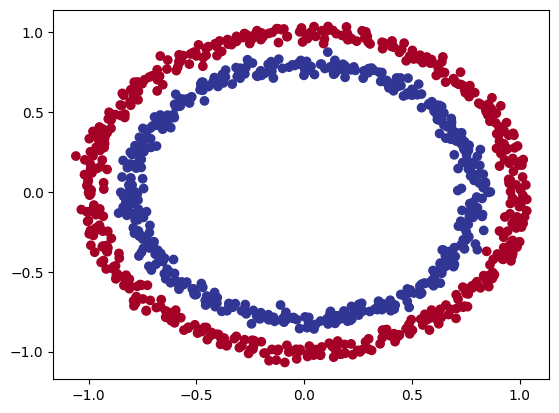

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(circles["X1"], circles["X2"], c=y, cmap= plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X_sample = X[0]
y_sample = y[0]
X_sample.shape, y_sample.shape

((2,), ())

In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test)

(800, 200)

In [ ]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)

In [ ]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
torch.manual_seed(42)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6539,  0.6516],
                      [ 0.2613, -0.4593],
                      [-0.0511, -0.2956],
                      [-0.0441,  0.2843],
                      [ 0.0009,  0.1307]])),
             ('layer_1.bias',
              tensor([-0.5135,  0.3774,  0.1849,  0.6813,  0.1786])),
             ('layer_2.weight',
              tensor([[ 0.0568, -0.3596,  0.3311,  0.3467, -0.1783]])),
             ('layer_2.bias', tensor([-0.3929]))])

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"First 10 predictions: {untrained_preds[:10]}")
print(f"First 10 test labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])
First 10 predictions: tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], grad_fn=<SliceBackward0>)
First 10 test labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.01)


In [ ]:
def accuracy_fn(y_pred, y_true):
  correct = torch.eq(y_pred, y_true).sum().item()
  acc = (correct / len(y_true)) * 100
  return acc


In [ ]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], grad_fn=<SliceBackward0>)

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], grad_fn=<SigmoidBackward0>)

In [ ]:
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
torch.manual_seed(42)

epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Accuracy: 50.00% | Test loss: 0.69638, Test acc: 50.00%
Epoch: 10 | Loss: 0.69345, Accuracy: 50.00% | Test loss: 0.69458, Test acc: 50.00%
Epoch: 20 | Loss: 0.69311, Accuracy: 48.25% | Test loss: 0.69511, Test acc: 46.50%
Epoch: 30 | Loss: 0.69299, Accuracy: 51.88% | Test loss: 0.69460, Test acc: 47.00%
Epoch: 40 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 50 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69473, Test acc: 46.00%
Epoch: 60 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 70 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69469, Test acc: 45.00%
Epoch: 80 | Loss: 0.69298, Accuracy: 51.50% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 90 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%


In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

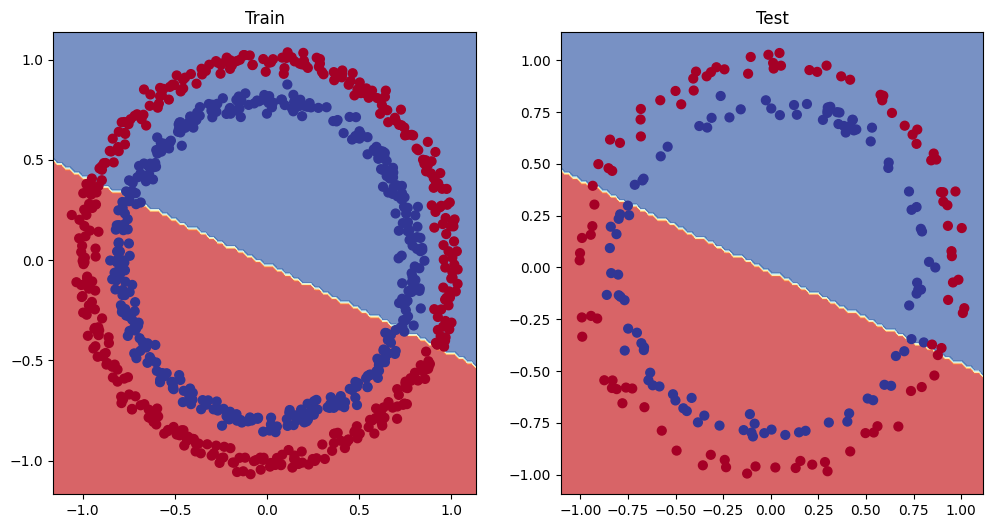

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [ ]:
torch.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true= y_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    y_test_logits = model_1(X_test).squeeze()
    y_pred = torch.round(torch.sigmoid(y_test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=y_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69468, Test acc: 51.00%
Epoch: 100 | Loss: 0.69369, Accuracy: 50.25% | Test loss: 0.69468, Test acc: 50.00%
Epoch: 200 | Loss: 0.69351, Accuracy: 50.12% | Test loss: 0.69468, Test acc: 49.50%
Epoch: 300 | Loss: 0.69339, Accuracy: 50.50% | Test loss: 0.69468, Test acc: 49.00%
Epoch: 400 | Loss: 0.69329, Accuracy: 50.38% | Test loss: 0.69468, Test acc: 48.50%
Epoch: 500 | Loss: 0.69322, Accuracy: 49.88% | Test loss: 0.69468, Test acc: 49.50%
Epoch: 600 | Loss: 0.69317, Accuracy: 49.50% | Test loss: 0.69468, Test acc: 53.00%
Epoch: 700 | Loss: 0.69313, Accuracy: 49.38% | Test loss: 0.69468, Test acc: 50.50%
Epoch: 800 | Loss: 0.69309, Accuracy: 50.00% | Test loss: 0.69468, Test acc: 51.00%
Epoch: 900 | Loss: 0.69307, Accuracy: 50.62% | Test loss: 0.69468, Test acc: 47.50%


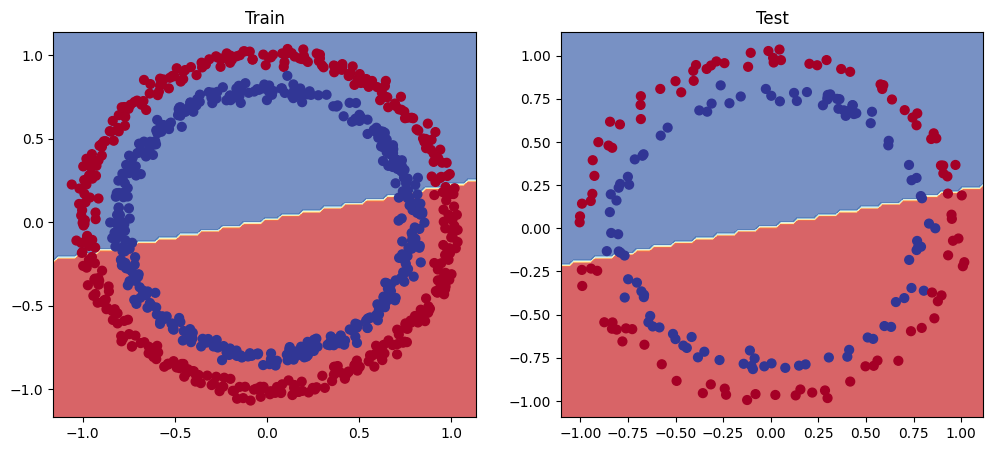

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1 ,2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
X_train_regression, X_test_regression , y_train_regression, y_test_regression = train_test_split(X_regression,
                                                                                                 y_regression,
                                                                                                 test_size=0.2,
                                                                                                 random_state=42)

print(len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression))

80 20 80 20


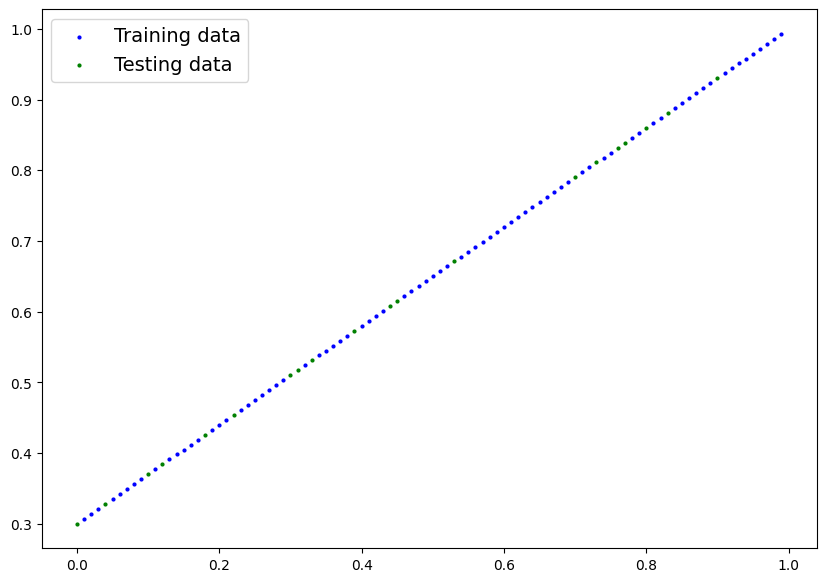

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer= torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.80353, Test loss: 0.73955
Epoch: 100 | Loss: 0.02930, Test loss: 0.01250
Epoch: 200 | Loss: 0.02346, Test loss: 0.01752
Epoch: 300 | Loss: 0.02341, Test loss: 0.01660
Epoch: 400 | Loss: 0.02382, Test loss: 0.01524
Epoch: 500 | Loss: 0.02303, Test loss: 0.01515
Epoch: 600 | Loss: 0.02270, Test loss: 0.01460
Epoch: 700 | Loss: 0.02148, Test loss: 0.01497
Epoch: 800 | Loss: 0.02129, Test loss: 0.01444
Epoch: 900 | Loss: 0.02147, Test loss: 0.01353


In [ ]:
len(test_pred)

20

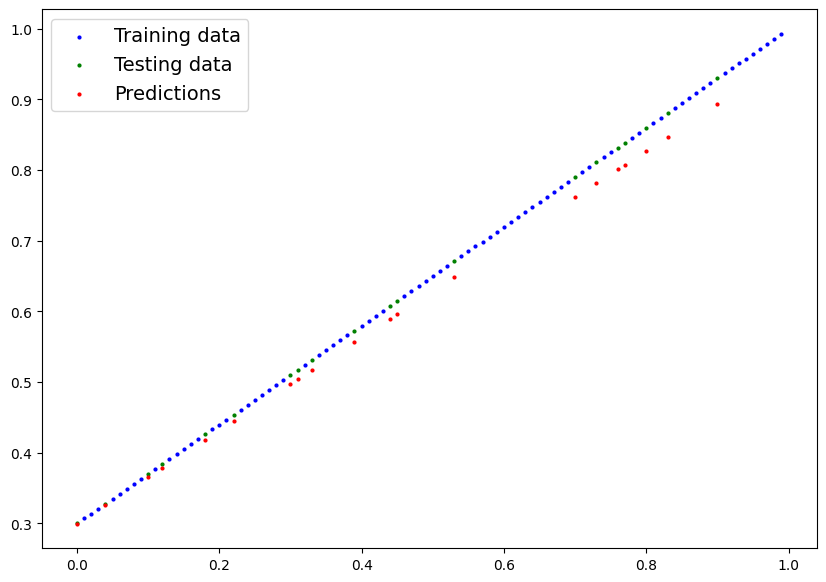

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=test_pred)

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(y_train))

800
800


In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
print(model_3);

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69203, Test acc: 55.50%
Epoch: 10 | Loss: 0.68651, Accuracy: 53.00% | Test loss: 0.68401, Test acc: 56.50%
Epoch: 20 | Loss: 0.67698, Accuracy: 53.50% | Test loss: 0.67149, Test acc: 57.00%
Epoch: 30 | Loss: 0.66078, Accuracy: 60.75% | Test loss: 0.65295, Test acc: 62.00%
Epoch: 40 | Loss: 0.63241, Accuracy: 66.88% | Test loss: 0.62340, Test acc: 70.00%
Epoch: 50 | Loss: 0.58509, Accuracy: 74.25% | Test loss: 0.57695, Test acc: 76.50%
Epoch: 60 | Loss: 0.52041, Accuracy: 81.50% | Test loss: 0.52935, Test acc: 81.00%
Epoch: 70 | Loss: 0.43584, Accuracy: 90.75% | Test loss: 0.45495, Test acc: 89.00%
Epoch: 80 | Loss: 0.33954, Accuracy: 96.50% | Test loss: 0.35861, Test acc: 95.50%
Epoch: 90 | Loss: 0.24768, Accuracy: 98.50% | Test loss: 0.27244, Test acc: 97.00%


In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:5] , y_test[:5]

(tensor([1., 0., 1., 0., 1.]), tensor([1., 0., 1., 0., 1.]))

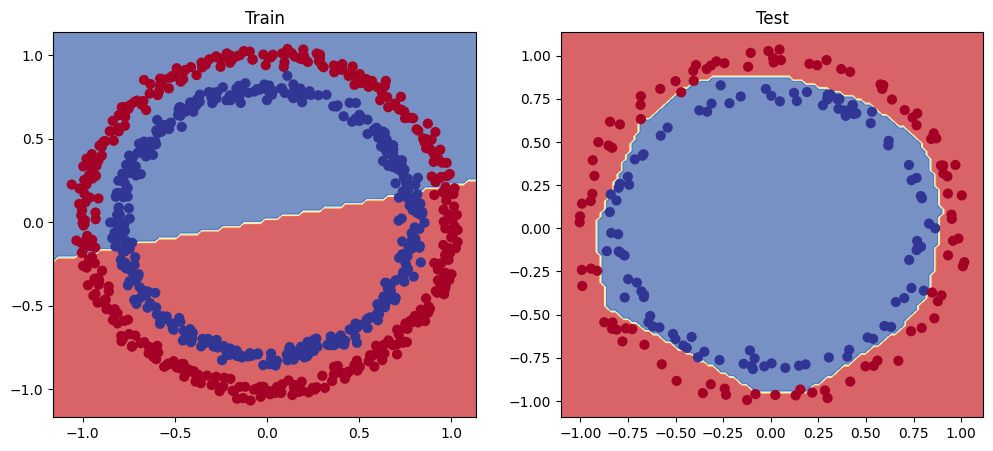

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1 ,2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [ ]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

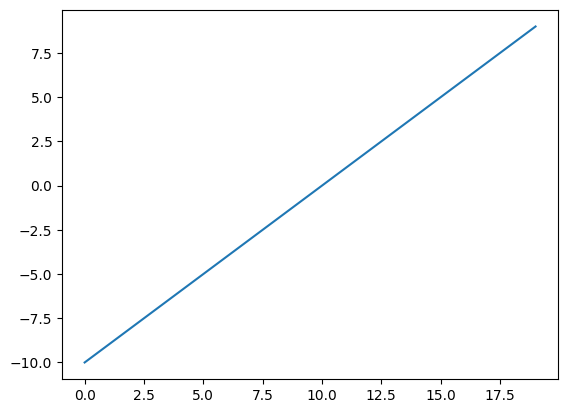

In [ ]:
plt.plot(A)

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

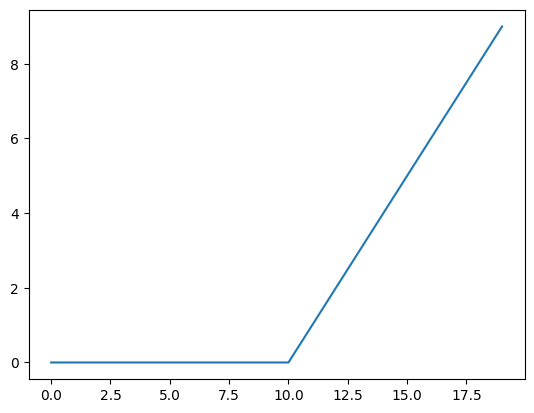

In [ ]:
plt.plot(relu(A))

In [ ]:
def sigmoid(x):
  return 1 / (1 +  torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

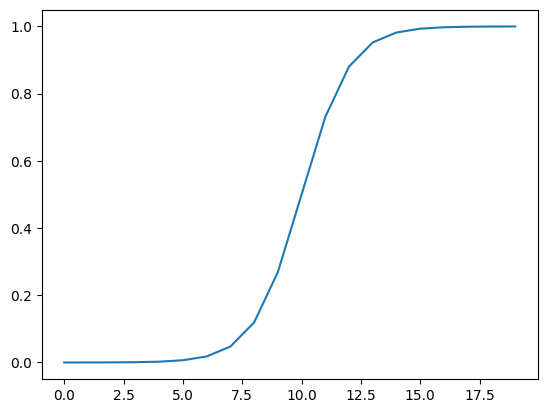

In [ ]:
plt.plot(sigmoid(A))

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


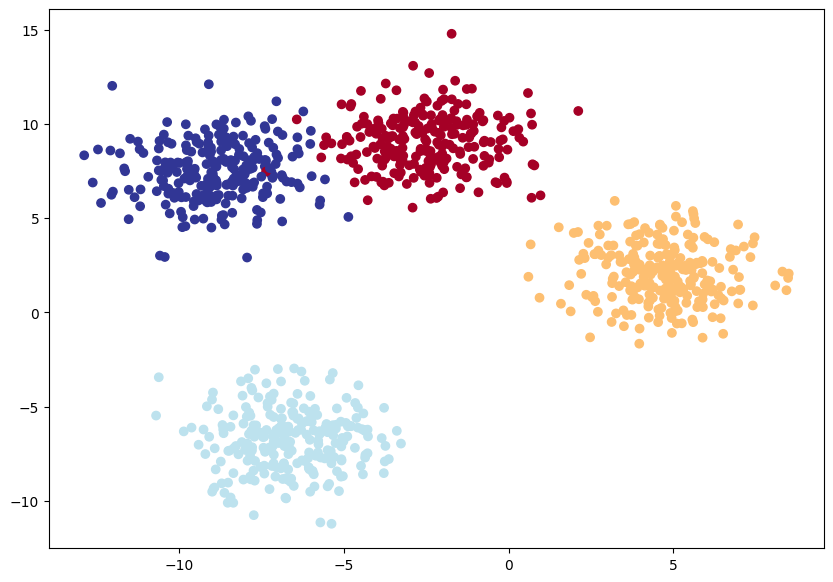

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED
                                                                        )

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import nn
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
model_4.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('linear_layer_stack.1.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.276

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.01)


In [ ]:
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

In [ ]:
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [ ]:
y_logits = model_4(X_blob_train.to(device))

y_pred_prob = torch.softmax(y_logits, dim=1)
y_logits[:5], y_pred_prob[:5]

(tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
         [ 0.2210, -1.5439,  0.0420,  1.1531],
         [ 2.8698,  0.9143,  3.3169,  1.4027],
         [ 1.9576,  0.3125,  2.2244,  1.1324],
         [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>),
 tensor([[0.1838, 0.3422, 0.1500, 0.3239],
         [0.2199, 0.0377, 0.1839, 0.5586],
         [0.3406, 0.0482, 0.5326, 0.0785],
         [0.3405, 0.0657, 0.4446, 0.1492],
         [0.2527, 0.0424, 0.2283, 0.4766]], grad_fn=<SliceBackward0>))

In [ ]:
y_pred_prob[0]

tensor([0.1838, 0.3422, 0.1500, 0.3239], grad_fn=<SelectBackward0>)

In [ ]:
torch.sum(y_pred_prob[0])

tensor(1., grad_fn=<SumBackward0>)

In [ ]:
print(y_pred_prob[0])
print(torch.argmax(y_pred_prob[0]))

tensor([0.1838, 0.3422, 0.1500, 0.3239], grad_fn=<SelectBackward0>)
tensor(1)


In [ ]:
torch.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  y_logits = model_4(X_blob_train).squeeze()
  y_pred_prob = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_blob_train)

  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred_prob)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                      y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test_loss: {test_loss:.5f} | Test Acc : {test_acc:.2f}%")

Epoch: 0 | Loss: 0.86773, Accuracy: 71.50% | Test_loss: 0.81474 | Test Acc : 74.00%
Epoch: 10 | Loss: 0.57449, Accuracy: 91.50% | Test_loss: 0.55571 | Test Acc : 96.00%
Epoch: 20 | Loss: 0.43570, Accuracy: 98.12% | Test_loss: 0.42694 | Test Acc : 98.50%
Epoch: 30 | Loss: 0.35187, Accuracy: 98.62% | Test_loss: 0.34704 | Test Acc : 99.00%
Epoch: 40 | Loss: 0.29502, Accuracy: 98.75% | Test_loss: 0.29190 | Test Acc : 99.00%
Epoch: 50 | Loss: 0.25368, Accuracy: 98.88% | Test_loss: 0.25123 | Test Acc : 99.50%
Epoch: 60 | Loss: 0.22219, Accuracy: 98.88% | Test_loss: 0.21991 | Test Acc : 99.50%
Epoch: 70 | Loss: 0.19744, Accuracy: 99.12% | Test_loss: 0.19507 | Test Acc : 99.50%
Epoch: 80 | Loss: 0.17752, Accuracy: 99.12% | Test_loss: 0.17494 | Test Acc : 99.00%
Epoch: 90 | Loss: 0.16120, Accuracy: 99.12% | Test_loss: 0.15835 | Test Acc : 99.00%


In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[ 0.7055,  2.8742, -5.9827, -3.7414],
        [ 3.1433, -4.3749,  1.2404,  4.9351],
        [-0.3652, -3.7502,  8.6465,  5.0048],
        [ 0.1239,  2.2239, -3.3868, -2.7648],
        [ 2.6826,  0.2406, -6.0153, -0.8598],
        [ 3.6261, -5.3661,  1.8644,  6.0845],
        [-0.8081, -2.7007,  7.8196,  3.7709],
        [ 2.7396, -0.9605, -3.9738,  0.6639],
        [ 0.1512, -5.4353, 10.4478,  7.0341],
        [ 2.6757, -0.5093, -4.6372,  0.1021]])

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = y_pred_probs.argmax(dim=1)

print(f"Predictions: {y_preds[:10]},\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.0%


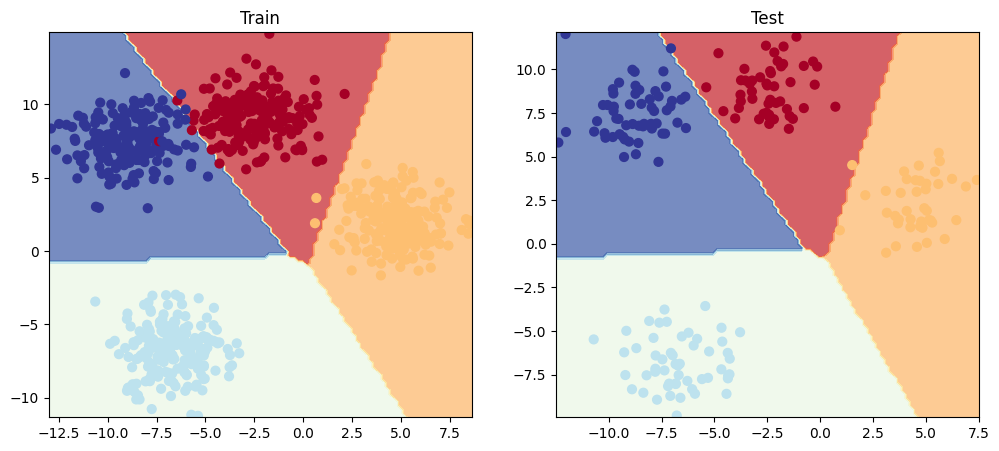

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1 ,2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:

from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9900)